# Generator of a Random Field Catalog with four Spherical Voids

Spatial distribution of points: uniform

Box Length: 100h


### Abacus Cosmos 720 box Plank

Number of Halos: 8'714.934

Volume = ( 720 Mpc/h )**3

Halo density: 0.02334891010802469 halo/ (Mpc/h)**3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

# Halos per (Mpc/h)**3
D_halo = 0.02334891010802469

# Cubic box size (Mpc/h)
BL = 100

N = 5000

VOID_TYPE = "MSV"

# Void radius (Mpc/h)
R = [5, 10, 15, 20 ]



# Void Center(Mpc/h)
C = np.array([[ 3/8. , 3/8. , 3/8.],
              [ 3/4. , 3/4. , 1/4.],
              [ 3/4. , 1/4. , 3/4.],
              [ 1/4. , 3/4. , 3/4.]]) * BL

# Void Type 
# "clean" (without galaxies inside) or "dirty" (with sparse galaxies)
VoidType = "clean"
# If VoidType = "dirty", P_o = Probability to find a galaxy inside the void:
p_0 = 0.1

# Number of particles
# N = int( D_halo * (BL)**3 ) 

print("Box Length:", BL)
print("Number of Particles:",N)
print("Void Radius:", R)
print("Void Centers:", C)

# Initialize random seed
seed = 1
rand.seed(1)
print ("random seed:", seed)


def IsInsideVoids(v):
    # Position vector components
    x = v[0]
    y = v[1]
    z = v[2]
    
    for i in range( len(C)):
        # Void sphere center
        x0 = C[i,0]
        y0 = C[i,1]
        z0 = C[i,2]
        
        # Distance to the void center
        d = ( (x0 - x)**2 + (y0 - y)**2 + (z0 - z)**2)**0.5 
    
        if ( d < R[i] ):
            return 1;
    
    return 0;
    

def rand_pos():
    x = rand.random() * BL
    y = rand.random() * BL
    z = rand.random() * BL   
    return ([x,y,z])

Box Length: 100
Number of Particles: 5000
Void Radius: [5, 10, 15, 20]
Void Centers: [[37.5 37.5 37.5]
 [75.  75.  25. ]
 [75.  25.  75. ]
 [25.  75.  75. ]]
random seed: 1


In [2]:
positions = []

for i in range(N): 
    r = rand_pos();
    
    if( VoidType == "clean"):
        while ( IsInsideVoids(r) ):
            r = rand_pos()
    elif(VoidType == "dirty" ):
        while ( IsInsideVoids(r) ):
            p = rand.random()
            if (p<p_0):
                break
            r = rand_pos()
    else:
        raise Exception("'VoidType' must be 'clean' or 'dirty'.")
        
    positions.append(r)  

positions = np.array(positions)

print("positions.shape:", positions.shape)



positions.shape: (5000, 3)


In [3]:
# Here we open and close the catalog. 
# This method is used because "np.savetxt" lefts a tab separator that NGL cannot recognize.

print(" ... ")

filename = "../data/Testing_Data/" + str(VOID_TYPE) +"_R" + str(R)  
filename += "_BL_" + str(BL) + "_N" + str(N) + ".cat"

np.savetxt(filename, positions)

print("Data saved to '" + filename + "'.") 

 ... 
Data saved to '../data/Testing_Data/MSV_R[5, 10, 15, 20]_BL_100_N5000.cat'.


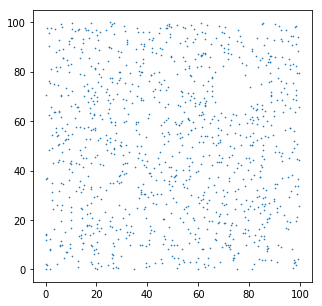

In [4]:
# Plot a slice centered at Z_c, slice tickness s_t

Z_c = BL * 2 / 8

s_t = 10

positions_slice = positions[ np.where( abs(positions[:,2]- Z_c )< s_t )]

X = positions_slice[:,0]
Y = positions_slice[:,1]

fig = plt.figure(figsize=[5,5])
plt.scatter(X,Y, s=0.4)
plt.show()